In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('/content/drive/MyDrive/Image classifier py/model/test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

/content/drive/MyDrive/Image classifier py/model/test_images/sharapova1.jpg

x, y, and rgb channel value

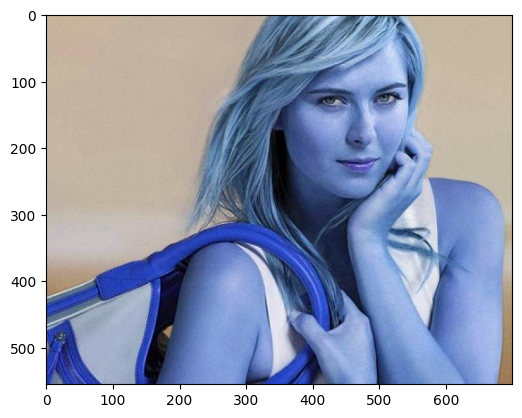

In [3]:
plt.imshow(img)


here the 3rd channel is removed

array([[[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [195, 181, 158],
        [194, 180, 157],
        [193, 179, 156]],

       [[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [196, 182, 159],
        [194, 180, 157],
        [193, 179, 156]],

       [[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [196, 182, 159],
        [195, 181, 158],
        [193, 179, 156]],

       ...,

       [[ 26,  58, 158],
        [ 30,  59, 163],
        [ 33,  59, 165],
        ...,
        [154, 120,  84],
        [154, 120,  84],
        [154, 120,  84]],

       [[ 30,  62, 162],
        [ 32,  61, 165],
        [ 35,  61, 167],
        ...,
        [154, 120,  84],
        [154, 120,  84],
        [154, 120,  84]],

       [[ 35,  67, 167],
        [ 34,  63, 167],
        [ 36,  62, 168],
        ...,
        [153, 119,  83],
        [153, 119,  83],
        [153, 119,  83]]], dtype=uint8)
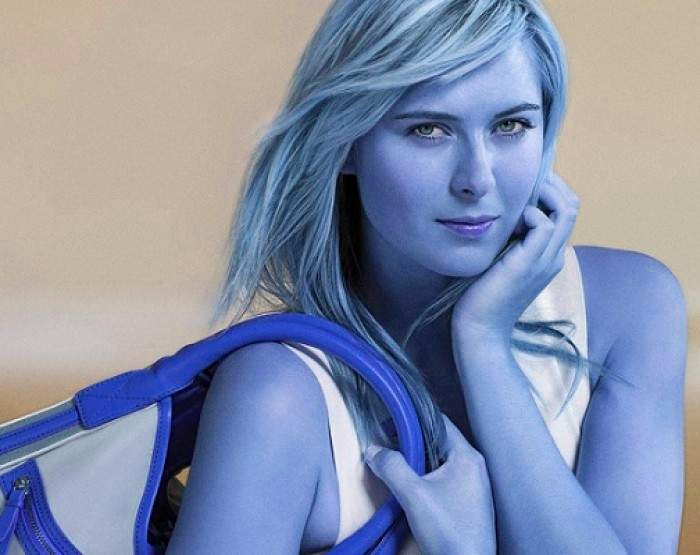

In [4]:
img

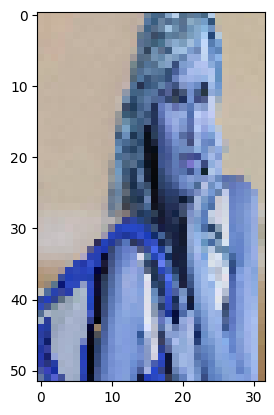

In [5]:
imgg=cv2.resize(img,(32,52))
plt.imshow(imgg)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape


(555, 700)

an image is basically a numpy array of values 1 to 255


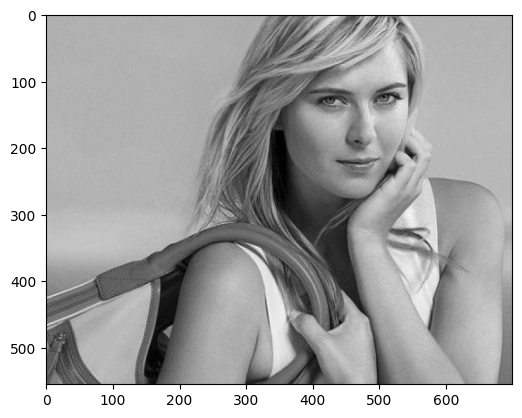

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Image classifier py/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Image classifier py/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

X Y width and height of where the face is there

face is a 2 d array

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

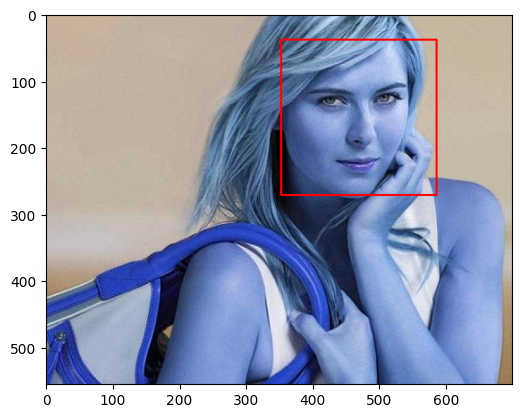

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

We make functions on black and white images as haar cascade works on black and white images

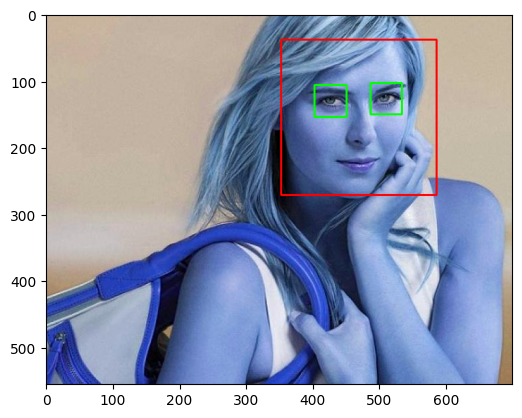

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:                                          #if there are more than 1 fACES in the faces
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)   #making box again
    roi_gray = gray[y:y+h, x:x+w]                    #region of interest deals with whats in the box and not outside
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)        #detects eyes only inside face box, which is black and white
    for (ex,ey,ew,eh) in eyes:                            #2 eyes , so for loop, new variables
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)      #makes eye box on coloured image


plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

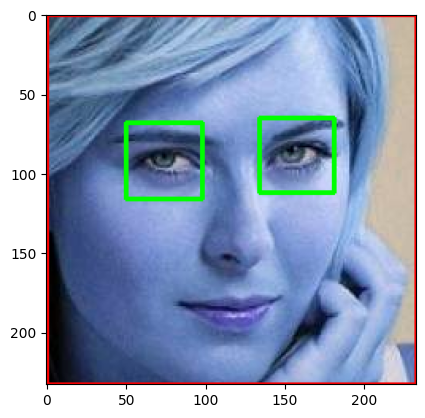

In [12]:
plt.imshow(roi_color)

This pieceof codes created cropped folder if it does not exist


** **Preprocessing: Use wavelet transform as a feature for traning our model**

In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [13]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

In [14]:
# @title Default title text
#stackoverflow code
import numpy as np
import pywt               # importing wavelet
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

Defining the w2d Function: This function takes three parameters: img (the input image), mode (the wavelet mode, default is set to 'haar'), and level (the level of decomposition, default is set to 1).

Converting the Image: Inside the function, the input image img is converted to grayscale using OpenCV's cv2.cvtColor function with the COLOR_RGB2GRAY conversion flag. Then, it's converted to float and normalized to the range [0, 1] to increase precision


Computing Wavelet Coefficients: Next, the function computes the wavelet coefficients using pywt.wavedec2. This function decomposes the image into approximation and detail coefficients at different levels specified by the level parameter.


Processing Coefficients: The approximation coefficients at the first level (coeffs[0]) are zeroed out (*= 0), effectively removing the low-frequency information. This step effectively emphasizes the high-frequency details in the image.


Reconstruction: The modified wavelet coefficients are then used to reconstruct the image using pywt.waverec2, which performs the inverse wavelet transform. This reconstructs an image from the modified coefficients.


Converting Back to Unsigned Integer 8-bit: Finally, the reconstructed image is scaled back to the range [0, 255] and converted to unsigned 8-bit integers (np.uint8) to ensure compatibility with image display and processing.

This function essentially applies a wavelet transform to the input image, emphasizes high-frequency details, and returns the modified image.

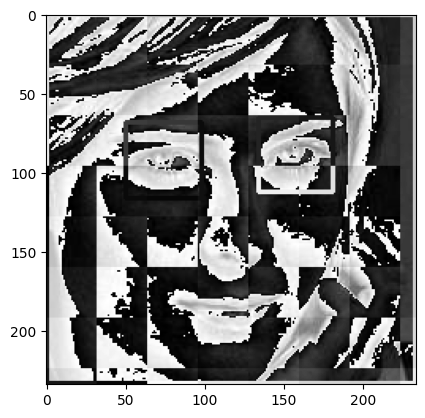

In [15]:

im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region
Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [67]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color.astype('uint8')

In [17]:
path_cropped='/content/drive/MyDrive/Image classifier py/model/DATASET/cropped'
path_data='/content/drive/MyDrive/Image classifier py/model/DATASET'


In [18]:
import os
img_dirs = []
for entry in os.scandir(path_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
import os
import shutil

cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_cropped + '/cropped' + celebrity_name
            if not os.path.exists(cropped_folder):

                cropped_image_dirs.append(cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

In [ ]:
celebrity_file_names_dict['lionel_messi']

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y **

In [21]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'maria_sharapova': 0,
 'serena_williams': 1,
 'roger_federer': 2,
 'virat_kohli': 3,
 'lionel_messi': 4}

In [ ]:
celebrity_file_names_dict.items()

In [23]:
X=[]
y=[]
for celebrity_names,training_files in celebrity_file_names_dict.items():  #key,list
  for training_img in training_files:
    img=cv2.imread(training_img)
    if img is None:
      continue
    scaled_raw_img=cv2.resize(img,(32,32))
    img_har = w2d(img,'db1',5)
    scaled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1))) #we stack wlet img and real image on top of eachother
    X.append(combined_img)
    y.append(class_dict[celebrity_names])







Now , 2 images, one wavelet and another original is stacked on top of each other and returned

X has list of all conbined images

In [24]:
print(len(X))
print(len(X[0]))

167
4096


In [25]:
# 4096 as

32*32*3          +        32*32
#pixels of rgb       wavelet img

4096

In [26]:
type(X)

list

In [27]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(167, 4096)

we're transforming the list of combined image arrays into a multi-dimensional NumPy array. This is a common practice in machine learning tasks because many libraries, such as scikit-learn, expect input data to be in array format.

ALL OF THIS IS DONE AS ML MODELS CAN ONLY UNDERSTAND NUMBERS

In [28]:
print(len(X[0]))


4096


**NOW WE TRAIN THE MODELL**

Data cleaning process is done. Now we are ready to train our model







We will use SVM with rbf kernel tuned with heuristic finetuning

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [31]:
X_train[0:5]

array([[238., 230., 230., ...,  45.,  80.,  55.],
       [  4.,   7.,  21., ...,  87.,  18., 255.],
       [  5.,   7.,   8., ...,   1.,   0., 227.],
       [ 42.,  44.,  51., ...,   4.,  55.,   5.],
       [  7.,   2.,   1., ..., 248., 117.,  41.]])

In [32]:
X_train= np.array(X_train).reshape((125, 4096))
X_train.shape

(125, 4096)

In [33]:
X_train=X_train.tolist()

We are rreshaping the 3 dimension array to 2

In [34]:
X_test
X_test= np.array(X_test).reshape((42, 4096))

In [35]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])  #randdom parameter values, we dont know the perfect one
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9047619047619048

We can get 90 % accuracy by this


In [36]:
print(X_test.shape)
print(X_test)

(42, 4096)
[[ 35.  30.  31. ...  54.  87. 195.]
 [ 67. 115. 211. ... 241. 245. 243.]
 [ 13.  13.  13. ... 248.   0. 253.]
 ...
 [ 50.  68.  79. ...   0.   0.   0.]
 [131. 235. 203. ... 231. 228. 154.]
 [184. 170. 151. ... 235. 242. 233.]]


In [37]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.86      0.75      0.80         8
           2       0.75      1.00      0.86         6
           3       0.92      1.00      0.96        12
           4       1.00      0.80      0.89        10

    accuracy                           0.90        42
   macro avg       0.91      0.91      0.90        42
weighted avg       0.92      0.90      0.90        42



This method predicts X_test and compares it with y_test and gives report

0 1 2 3 4 are the different answeres here

**Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters**

Using grid search cv, we will find out the best parameters like kernel and C value that will give best results for our model

basically like hyperparameter tuning

In [38]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [39]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear','poly']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

here we are creating a dictinoary  and have declared some values that we will test on,,,, and that we will iterate through to find the best result

In [40]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [41]:
print(df)

                 model  best_score  \
0                  svm       0.832   
1        random_forest       0.672   
2  logistic_regression       0.848   

                                   best_params  
0       {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 5}  
2                 {'logisticregression__C': 1}  


the 83 percent of svm is on validation set,not on test set

In [42]:
best_estimators  # it is basically a trained model

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [43]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [44]:
best_estimators['svm'].score(X_test,y_test)

0.9047619047619048

this 90 percent is on test set

In [45]:
best_estimators['random_forest'].score(X_test,y_test)

0.5952380952380952

In [46]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9047619047619048

In [47]:
best_clf = best_estimators['svm']

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
print(cm)

[[ 6  0  0  0  0]
 [ 0  6  2  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 12  0]
 [ 0  2  0  0  8]]


Text(95.72222222222221, 0.5, 'Truth')

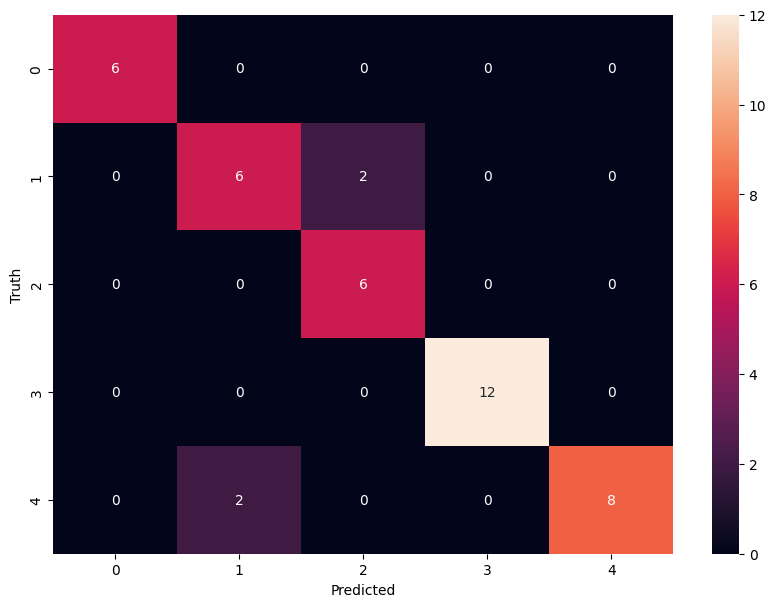

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

so y axis is class dict

it meaans , out of 42 times testing, 6 times it was maria sharapova
and no mistakes

2. 6 times it guess serena williams correctly, and 2 times it guessed roger federer which was a mistake

then for 2,3 no mistakes

for 4, 8 times correct and missed 2 times

In [50]:
class_dict

{'maria_sharapova': 0,
 'serena_williams': 1,
 'roger_federer': 2,
 'virat_kohli': 3,
 'lionel_messi': 4}

In [51]:
"""!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')"""

"!pip install joblib\nimport joblib\n# Save the model as a pickle in a file\njoblib.dump(best_clf, 'saved_model.pkl')"

In [52]:
"""import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))"""

'import json\nwith open("class_dictionary.json","w") as f:\n    f.write(json.dumps(class_dict))'

imagee=cv2.imread('/content/drive/MyDrive/image (2).png')
plt.imshow(imagee)

In [53]:
def find_celeb(num):
  for k,v in class_dict.items():
    if v==num:
      return k

In [88]:

imagee='/content/images.jpg'
cropped_imagee = get_cropped_image_if_2_eyes(imagee)
if cropped_imagee is not None:
    # Resize the cropped image to 32x32
    scaled_imagee = cv2.resize(cropped_imagee, (32, 32))
    print("Image cropped and resized successfully.")
else:
    print("Failed to crop image.")

Image cropped and resized successfully.


In [89]:
wl_imagee = w2d(cropped_imagee,'db1',5)
scaled_wl_imagee = cv2.resize(wl_imagee, (32, 32))
final_imagee= np.vstack((scaled_imagee.reshape(32*32*3,1),scaled_wl_imagee.reshape(32*32,1)))
final_imagee=final_imagee.reshape(1,4096)
predictions = best_clf.predict(final_imagee)


print(find_celeb(predictions))



virat_kohli


In [78]:
class_dict

{'maria_sharapova': 0,
 'serena_williams': 1,
 'roger_federer': 2,
 'virat_kohli': 3,
 'lionel_messi': 4}

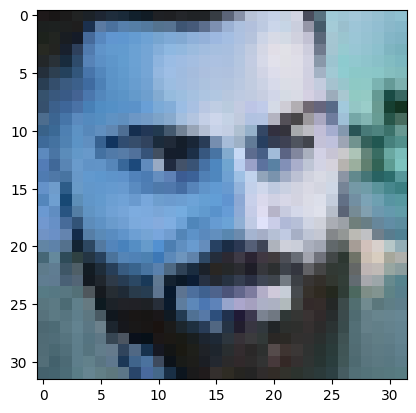

In [79]:

plt.imshow(scaled_imagee)

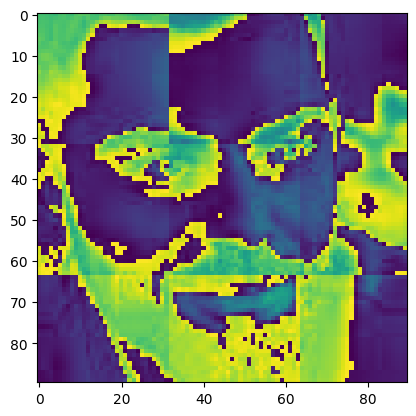

In [81]:
plt.imshow(wl_imagee)

In [82]:
final_imagee.shape

(1, 4096)

In [83]:
final_imagee

array([[30, 25, 26, ..., 15, 17, 19]], dtype=uint8)

In [84]:

final_imagee=final_imagee.reshape(1,4096)
print(final_imagee)


[[30 25 26 ... 15 17 19]]


In [85]:
pipe.fit(X_train,y_train)
predictions = pipe.predict(final_imagee)

In [86]:
print(predictions)

[3]
